<a href="https://www.kaggle.com/code/shandeep777/bank-customer-insights?scriptVersionId=225826823" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

#### Import library

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('/kaggle/input/bank-customer-data/bank.csv')
print(data)

      age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no   1787.0      no   no   
1      33       services  married  secondary      no   4789.0     yes  yes   
2      35     management   single   tertiary      no   1350.0     yes   no   
3      30     management  married   tertiary      no   1476.0     yes  yes   
4      59    blue-collar  married  secondary      no      0.0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no   -333.0     yes   no   
4517   57  self-employed  married   tertiary     yes  -3313.0     yes  yes   
4518   57     technician  married  secondary      no    295.0      no   no   
4519   28    blue-collar  married  secondary      no   1137.0      no   no   
4520   44   entrepreneur   single   tertiary      no   1136.0     yes  yes   

       contact  day month  duration  campaign  pdays  previous 

In [3]:
df = data.copy()

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787.0,no,no,cellular,19,oct,79,1.0,-1,0,unknown,no
1,33,services,married,secondary,no,4789.0,yes,yes,cellular,11,may,220,1.0,339,4,failure,no
2,35,management,single,tertiary,no,1350.0,yes,no,cellular,16,apr,185,1.0,330,1,failure,no
3,30,management,married,tertiary,no,1476.0,yes,yes,unknown,3,jun,199,NaN,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0.0,yes,no,unknown,5,may,226,NaN,-1,0,unknown,no


In [5]:
# convert the columns in proper format
df.columns = df.columns.str.title()

In [6]:
df.columns

Index(['Age', 'Job', 'Marital', 'Education', 'Default', 'Balance', 'Housing',
       'Loan', 'Contact', 'Day', 'Month', 'Duration', 'Campaign', 'Pdays',
       'Previous', 'Poutcome', 'Y'],
      dtype='object')

In [7]:
# Rename Columns
df.rename(
        columns = {
            'Marital' : 'Marital_Status',
            'Pdays' : 'Day_Since_Last_Contact',
            'Poutcome' : 'Previous_Outcom',
            'Y' : 'Subscription_Status'
        }, inplace = True
)

In [8]:
df.head(3)

,Age,Job,Marital_Status,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Day_Since_Last_Contact,Previous,Previous_Outcom,Subscription_Status
0,30,unemployed,married,primary,no,1787.0,no,no,cellular,19,oct,79,1.0,-1,0,unknown,no
1,33,services,married,secondary,no,4789.0,yes,yes,cellular,11,may,220,1.0,339,4,failure,no
2,35,management,single,tertiary,no,1350.0,yes,no,cellular,16,apr,185,1.0,330,1,failure,no


In [9]:
df.shape

(4521, 17)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4521 non-null   int64  
 1   Job                     4521 non-null   object 
 2   Marital_Status          4521 non-null   object 
 3   Education               4521 non-null   object 
 4   Default                 4521 non-null   object 
 5   Balance                 4495 non-null   float64
 6   Housing                 4521 non-null   object 
 7   Loan                    4521 non-null   object 
 8   Contact                 4521 non-null   object 
 9   Day                     4521 non-null   int64  
 10  Month                   4521 non-null   object 
 11  Duration                4521 non-null   int64  
 12  Campaign                4442 non-null   float64
 13  Day_Since_Last_Contact  4521 non-null   int64  
 14  Previous                4521 non-null   

In [11]:
df.describe()

,Age,Balance,Day,Duration,Campaign,Day_Since_Last_Contact,Previous
count,4521.000000,4495.000000,4521.000000,4521.000000,4442.000000,4521.000000,4521.000000
mean,41.170095,1423.153504,15.915284,263.961292,2.804818,39.766645,0.542579
std,10.576211,3015.932038,8.247667,259.856633,3.123293,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,443.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1474.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [12]:
df.describe(include='object')

,Job,Marital_Status,Education,Default,Housing,Loan,Contact,Month,Previous_Outcom,Subscription_Status
count,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,yes,no,cellular,may,unknown,no
freq,969,2797,2306,4445,2559,3830,2896,1398,3705,4000


### Data Cleaning

In [13]:
df.dtypes

Age                         int64
Job                        object
Marital_Status             object
Education                  object
Default                    object
Balance                   float64
Housing                    object
Loan                       object
Contact                    object
Day                         int64
Month                      object
Duration                    int64
Campaign                  float64
Day_Since_Last_Contact      int64
Previous                    int64
Previous_Outcom            object
Subscription_Status        object
dtype: object

In [14]:
# Define categorical columns
categorical_columns = [
    "Job", "Marital_Status", "Education", "Default", "Housing", "Loan", 
    "Contact", "Month", "Previous_Outcom", "Subscription_Status"
]

# Convert object columns to category
df[categorical_columns] = df[categorical_columns].astype("category")

In [15]:
df.dtypes

Age                          int64
Job                       category
Marital_Status            category
Education                 category
Default                   category
Balance                    float64
Housing                   category
Loan                      category
Contact                   category
Day                          int64
Month                     category
Duration                     int64
Campaign                   float64
Day_Since_Last_Contact       int64
Previous                     int64
Previous_Outcom           category
Subscription_Status       category
dtype: object

In [16]:
df.nunique()

Age                         67
Job                         12
Marital_Status               3
Education                    4
Default                      2
Balance                   2345
Housing                      2
Loan                         2
Contact                      3
Day                         31
Month                       12
Duration                   875
Campaign                    32
Day_Since_Last_Contact     292
Previous                    24
Previous_Outcom              4
Subscription_Status          2
dtype: int64

In [17]:
df_duplicate = df.duplicated()

In [18]:
df_duplicate

0       False
1       False
2       False
3       False
4       False
        ...  
4516    False
4517    False
4518    False
4519    False
4520    False
Length: 4521, dtype: bool

In [19]:
df.duplicated().sum()

0

In [20]:
df['Job'].value_counts(normalize=True, ascending = True)

Job
unknown          0.008405
student          0.018580
housemaid        0.024773
unemployed       0.028312
entrepreneur     0.037160
self-employed    0.040478
retired          0.050874
services         0.092236
admin.           0.105729
technician       0.169874
blue-collar      0.209246
management       0.214333
Name: proportion, dtype: float64

In [21]:
df.isnull().sum()

Age                        0
Job                        0
Marital_Status             0
Education                  0
Default                    0
Balance                   26
Housing                    0
Loan                       0
Contact                    0
Day                        0
Month                      0
Duration                   0
Campaign                  79
Day_Since_Last_Contact     0
Previous                   0
Previous_Outcom            0
Subscription_Status        0
dtype: int64

In [22]:
df.isnull().sum()/len(df)*100

Age                       0.000000
Job                       0.000000
Marital_Status            0.000000
Education                 0.000000
Default                   0.000000
Balance                   0.575094
Housing                   0.000000
Loan                      0.000000
Contact                   0.000000
Day                       0.000000
Month                     0.000000
Duration                  0.000000
Campaign                  1.747401
Day_Since_Last_Contact    0.000000
Previous                  0.000000
Previous_Outcom           0.000000
Subscription_Status       0.000000
dtype: float64

In [23]:
df['Balance'].mean()

1423.1535038932147

In [24]:
df['Balance'] = df['Balance'].fillna(df['Balance'].mean())
df['Balance'].isna().sum()

0

In [25]:
df['Campaign'].unique()

array([ 1., nan,  2.,  4.,  3.,  5.,  6., 10.,  9.,  7., 12., 14., 13.,
       24., 11.,  8., 29., 32., 16., 22., 18., 15., 30., 25., 21., 17.,
       19., 23., 20., 50., 28., 31., 44.])

In [26]:
df['Campaign'].mode()

0    1.0
Name: Campaign, dtype: float64

In [27]:
df['Campaign'] = df['Campaign'].fillna(df['Campaign'].mode()[0])
df['Campaign'].isnull().sum()

0

### Questions 
- How many married indivisuals are unemployed ?
- What are the avg age of indivisuals who suscribed to a term deposite versus those who did not ?
- How those the avg balance of customer change depending on the month they were contacted by the bank ?
- How does the avg duration of customer calls vary by month ?
- What is the distribution of maritial status (married / single / divorce) across different education levels ?

In [28]:
df.columns

Index(['Age', 'Job', 'Marital_Status', 'Education', 'Default', 'Balance',
       'Housing', 'Loan', 'Contact', 'Day', 'Month', 'Duration', 'Campaign',
       'Day_Since_Last_Contact', 'Previous', 'Previous_Outcom',
       'Subscription_Status'],
      dtype='object')

#### Data Visualization 

#### 1. How many married indivisuals are unemployed ?

In [29]:
married_employees = df[(df['Marital_Status'] == 'married') & (df['Job'] == 'unknown')]

count_married_unemployed = married_employees.shape[0]
print("No of married unemployed individuals:", count_married_unemployed)


No of married unemployed individuals: 30


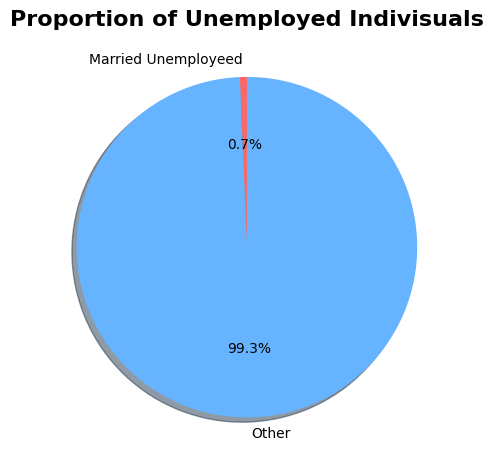

In [30]:
size = [count_married_unemployed, df.shape[0] - count_married_unemployed]

plt.pie(size, labels=['Married Unemployeed','Other'], autopct='%1.1f%%', startangle=90, colors=['#ff6666', '#66b3ff'], shadow=True)
plt.title('Proportion of Unemployed Indivisuals', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

#### 2. What are the avg age of indivisuals who suscribed to a term deposite versus those who did not ?

In [31]:
avg_age_subscribed = df[df['Subscription_Status'] == 'yes']['Age'].mean()
avg_age_not_subscribed = df[df['Subscription_Status'] == 'no']['Age'].mean()

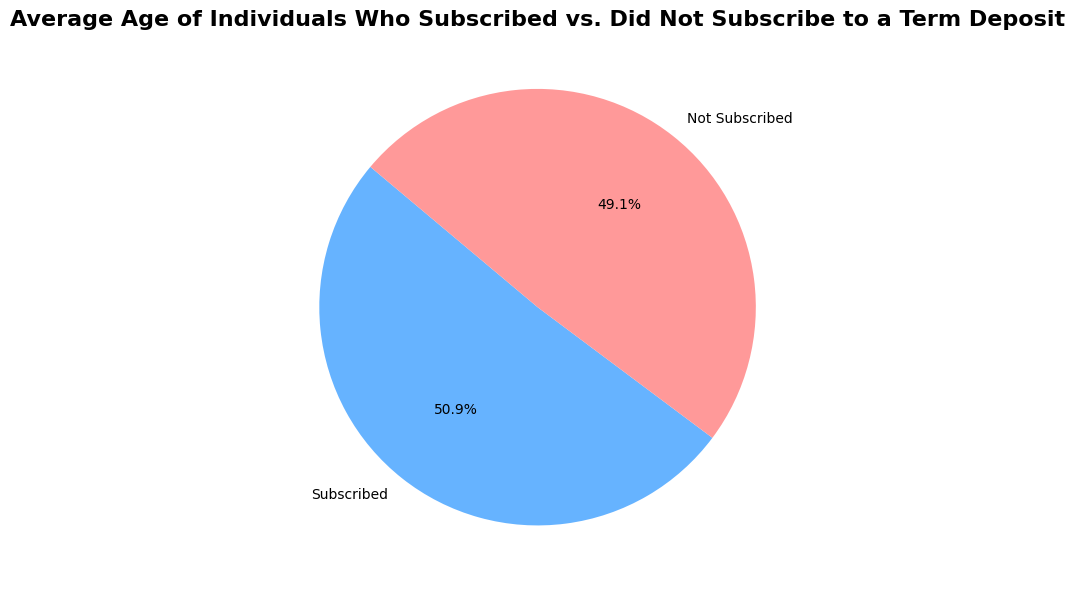

In [32]:
# Data for pie chart
labels = ['Subscribed', 'Not Subscribed']
average_ages = [avg_age_subscribed, avg_age_not_subscribed]

# Create a pie chart
plt.figure(figsize=(10,6))
plt.pie(average_ages, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#ff9999'])

# Adding title
plt.title('Average Age of Individuals Who Subscribed vs. Did Not Subscribe to a Term Deposit', fontsize=16, fontweight='bold')

# Show the plot
plt.savefig(r"D:\Python Project - Dataset\chart1.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

#### 3. How does the average balance vary across different contact months?

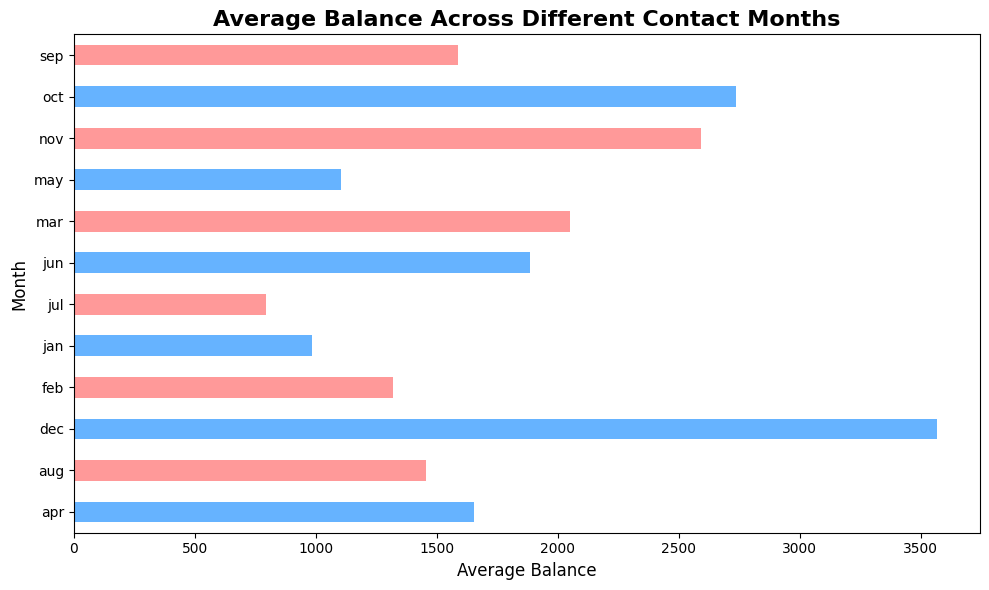

In [33]:
avg_balance_per_month = df.groupby('Month')['Balance'].mean()


plt.figure(figsize=(10,6))
avg_balance_per_month.plot(kind='barh', color=['#66b3ff', '#ff9999', '#66b3ff', '#ff9999', '#66b3ff', '#ff9999', '#66b3ff', '#ff9999', '#66b3ff', '#ff9999', '#66b3ff', '#ff9999'])

# Adding titles and labels
plt.title('Average Balance Across Different Contact Months', fontsize=16, fontweight='bold')
plt.ylabel('Month', fontsize=12)
plt.xlabel('Average Balance', fontsize=12)

# Show the plot
plt.tight_layout()
plt.savefig(r"D:\Python Project - Dataset\chart2.png", dpi=300, bbox_inches='tight')
plt.show()

#### 4. How does the average duration of customer calls vary by month?

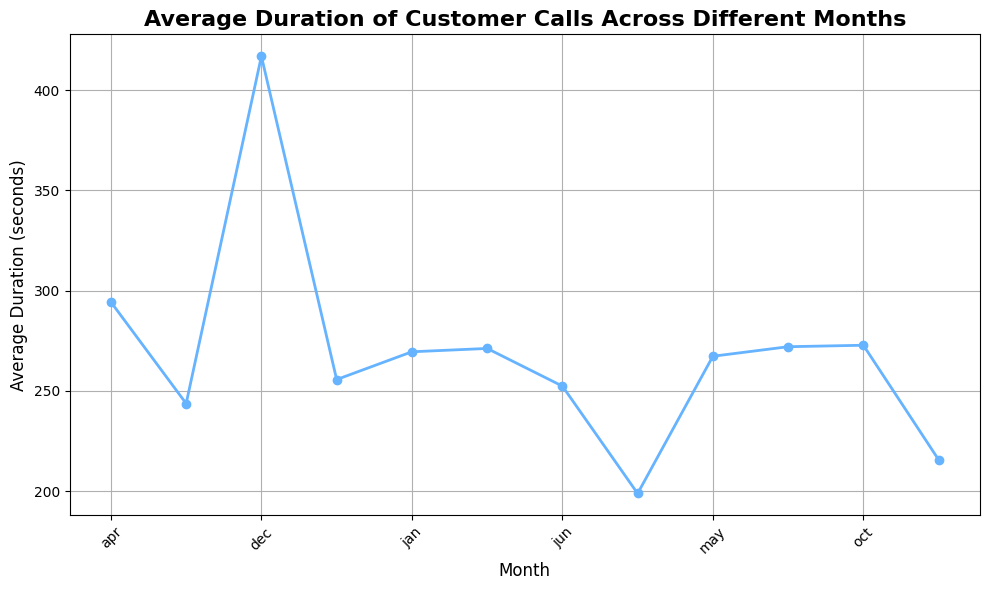

In [34]:
# Group by 'Month' and calculate the average duration of customer calls for each month
avg_duration_per_month = df.groupby('Month')['Duration'].mean()

# Visualization: Line chart for average call duration across months
plt.figure(figsize=(10,6))
avg_duration_per_month.plot(kind='line', marker='o', color='#66b3ff', linestyle='-', linewidth=2)

# Adding titles and labels
plt.title('Average Duration of Customer Calls Across Different Months', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Duration (seconds)', fontsize=12)

# Show the plot
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig(r"D:\Python Project - Dataset\chart3.png", dpi=300, bbox_inches='tight')
plt.show()

#### 5. What is the distribution of marital status (married/single/divorced) across different education levels?


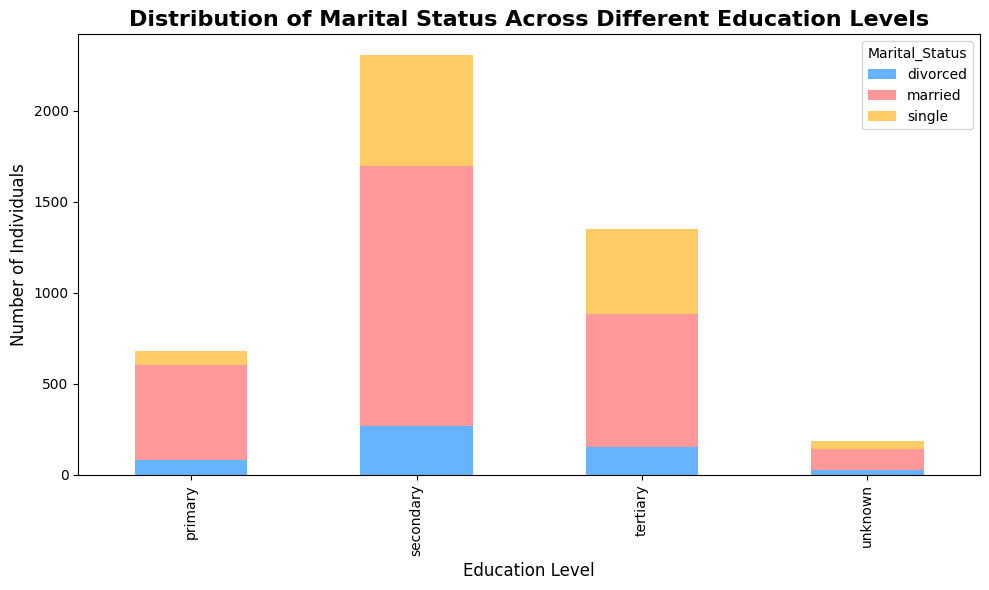

In [35]:
# Group by 'Education' and 'Marital_Status' to get the count of each marital status for each education level
education_marital_counts = df.groupby(['Education', 'Marital_Status']).size().unstack(fill_value=0)

# Plotting the stacked bar chart
education_marital_counts.plot(kind='bar', stacked=True, color=['#66b3ff', '#ff9999', '#ffcc66'], figsize=(10,6))

# Adding titles and labels
plt.title('Distribution of Marital Status Across Different Education Levels', fontsize=16, fontweight='bold')
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Number of Individuals', fontsize=12)

# Show the plot
plt.savefig(r"D:\Python Project - Dataset\chart4.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()